### Dataset (Kaggle)
- Dataset Name: Advertising Dataset
- Dataset link = https://www.kaggle.com/datasets/ashydv/advertising-dataset
- Business Scenario
A consumer goods company promotes its product using multiple advertising channels:
Television (TV)
Radio
Newspaper
The company wants to understand:
“How do different advertising channels together influence product sales?”
They also want to predict future sales based on planned advertising budgets.
You are appointed as a Data Analyst to analyze the data and build a predictive model.
#### Tasks
1. Load the dataset and examine the available columns.
2. Use TV, Radio, and Newspaper advertising spends as input features.
3. Use Sales as the target variable.
4. Build a model that learns the relationship between advertising spends and sales.
5. Train the model using historical data.
6. Predict sales for unseen data points.
7. Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30
8. Evaluate the model’s prediction error.
9.Interpret the coefficients of the model:
Which advertising medium has the strongest impact on sales?
Which medium has the least impact?
10. Visualize:
Actual sales vs predicted sales
11. Based on your analysis, suggest:
One business recommendation to improve sales
One technical improvement to improve prediction accuracy
 
Advertising Dataset | Kaggle
Kaggle is the world’s largest data science community with powerful tools and resources to help you achieve your data science goals.
 

In [3]:
import numpy as np
import pandas as pd
 
data=pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/week-9/advertising.csv")
df=pd.DataFrame(data)
# Input data: Years of Experience
X = df[['TV','Radio','Newspaper']]
 

y = df['Sales']

X,y

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2      12.0
 3      16.5
 4      17.9
        ... 
 195     7.6
 196    14.0
 197    14.8
 198    25.5
 199    18.4
 Name: Sales, Length: 200, dtype: float64)

In [5]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 160
Test samples: 40


In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Intercept: 4.714126402214131
Number of coefficients: 3


In [8]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))
 

,Actual Sales,Predicted Sales
0,16.9,17.03
1,22.4,20.41
2,21.4,23.72
3,7.3,9.27
4,24.7,21.68
5,12.6,12.57
6,22.3,21.08
7,8.4,8.69
8,16.5,17.24
9,16.1,16.67


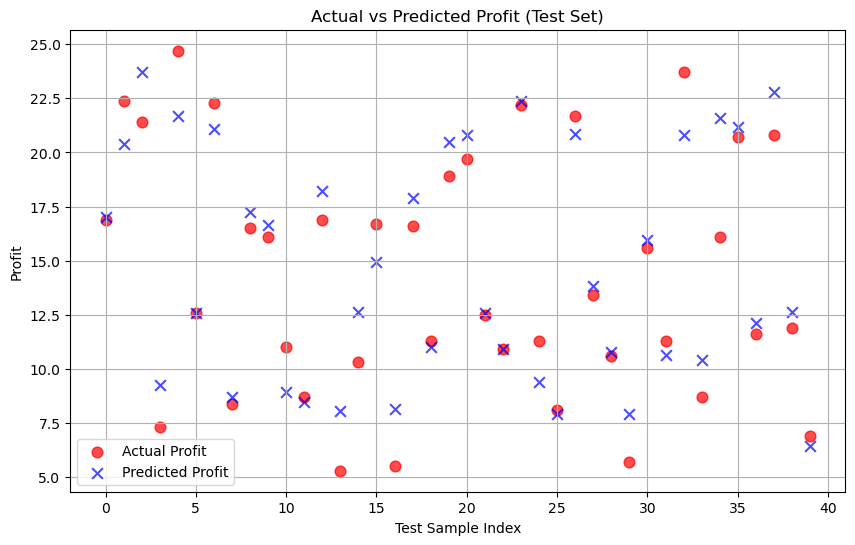

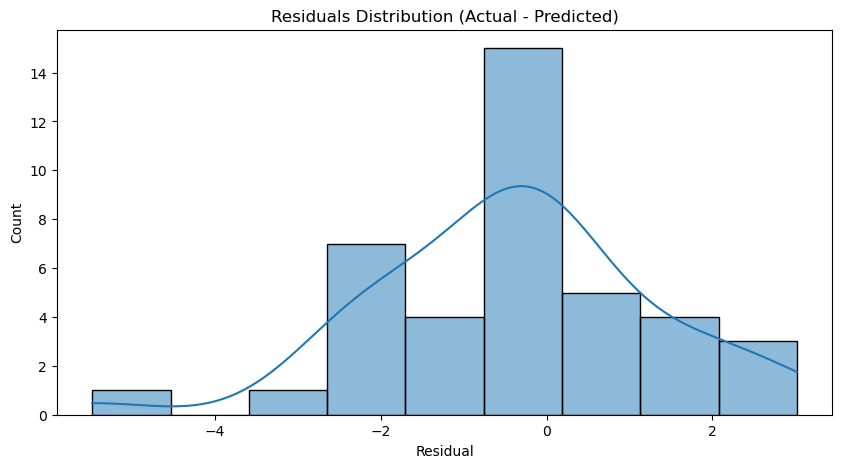

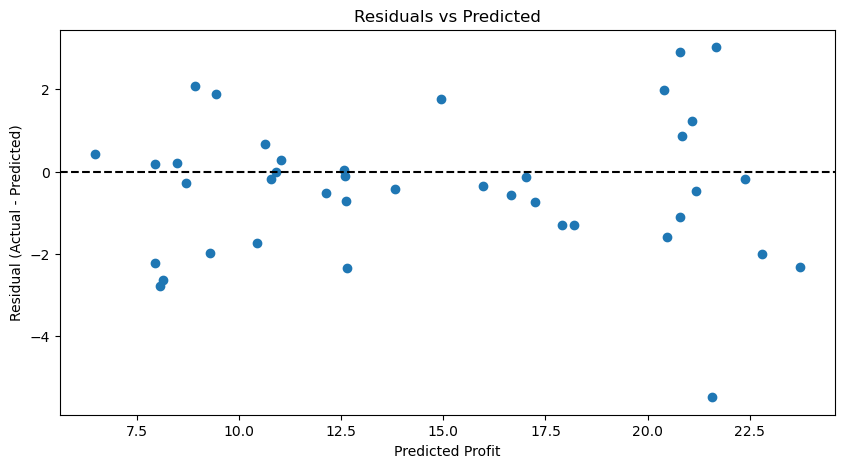

In [ ]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.grid("on")
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, /Users/anusreereddysama/Downloads/insurance.csv=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 

 

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
 

Mean Squared Error (MSE): 2.91
R^2 Score: 0.9059
